In [117]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_prominences, peak_widths, medfilt2d
import matplotlib.pyplot as plt

In [118]:
folder_name = '1645186354'
file_nr = '1'

In [119]:
df = pd.read_csv(f'rawdata/{folder_name}/emotions{file_nr}.csv', header=None)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (148,149,150,151,152,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [120]:
# remove not needed columns (no idea what they are)
df = df.drop(df.columns[46:], axis=1)

In [121]:
# put names to columnst
df.columns =["Row","Timestamp","Combined Event Source","SlideEvent","StimType","Duration","CollectionPhase","SourceStimuliName","SampleNumber","Anger","Contempt","Disgust","Fear","Joy","Sadness","Surprise","Engagement","Valence","Attention","Brow Furrow","Brow Raise","Cheek Raise","Chin Raise","Dimpler","Eye Closure","Eye Widen","Inner Brow Raise","Jaw Drop","Lip Corner Depressor","Lip Press","Lip Pucker","Lip Stretch","Lip Suck","Lid Tighten","Mouth Open","Nose Wrinkle","Smile","Smirk","Upper Lip Raise","Pitch","Yaw","Roll","Interocular Distance","SampleNumber","width","height"]

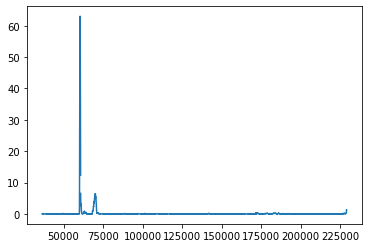

In [127]:
plt.plot(df["Timestamp"], df['Anger'])

In [128]:
x = df['Anger']
peaks, _ = find_peaks(x)
prominences = peak_prominences(x, peaks)[0]
contour_heights = x[peaks] - prominences

In [129]:
# peak max prominence
contour_heights.describe()

count    748.000000
mean       0.179452
std        2.345551
min        0.000000
25%        0.002213
50%        0.003934
75%        0.015459
max       61.596508
Name: Anger, dtype: float64

In [130]:
results_full = peak_widths(x, peaks, rel_height=1)
max(results_full[0])

45.15708137902038

In [131]:
medfilt2d(df['Contempt'])

ValueError: object of too small depth for desired array